<a href="https://colab.research.google.com/github/rajprasad001/deep_learning_concepts/blob/master/Project_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimizers

TASK

* Motivation    : Analyze the affect of different Optimizers on the training behaviour
  
 * Optimizer 1: Adadelta,
 * Optimizer 2: Adagrad
 * Optimizer 3: Adam)
 * Optimizer 4: Adamax,
 * Optimizer 5: Ftrl,
 * Optimizer 6: Nadam,
 * Optimizer 7: SGD

* Dataset       :
 * Cifar10, 
 *MNIST Fashion

* Architecture  :
 * Basic Convolutional Neural Network
 * Resnet
 * InceptionNet

* Comparision Criteria : Training Curve
 * Steps unitll convergence
 * Training Accuracy 
 * Loss
 * Stability of Training

 ## Importing Dependencies(Libraries)

Major Libraries Used : TensorFlow, Keras, scikit-learn, matplotlib, NumPy

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.layers import Add,BatchNormalization

## Loading and Splitting Data

### Loading and Splitting CIFAR10 DATA into Train, Validation and Test 

In [2]:
#Splitting the data into Train and Test. The Test Data should be completely unseen.
#By default 10000 instances are used as test data in Cifar10
(cifar_train_x_temp, cifar_train_y_temp), (cifar_test_x , cifar_test_y) =cifar10.load_data() 

#Further, for hyperparameter tuning, 20% of the train data is futher split into train and validation data
cifar_train_x, cifar_val_x, cifar_train_y, cifar_val_y = train_test_split(cifar_train_x_temp, cifar_train_y_temp, test_size=0.20, random_state=42)

#Standardizing the dataset
cifar_train_x, cifar_val_x, cifar_test_x = cifar_train_x/255.0, cifar_val_x/255.0, cifar_test_x/255.0

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
print('cifar10 train data      : {}'.format(cifar_train_x.shape))
print('cifar10 validation data : {}'.format(cifar_val_x.shape))
print('cifar10 test data       : {}'.format(cifar_test_x.shape))

cifar10 train data      : (40000, 32, 32, 3)
cifar10 validation data : (10000, 32, 32, 3)
cifar10 test data       : (10000, 32, 32, 3)


In [4]:
#Standardizing the train dataset
#cifar_train_y = cifar_train_y.reshape((-1))
#cifar_train_x = tf.data.Dataset.from_tensor_slices((cifar_train_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_train_y.astype(np.int32)))

#Standardizing the validation dataset
#cifar_val_y = cifar_val_y.reshape((-1))
#cifar_val_x = tf.data.Dataset.from_tensor_slices((cifar_val_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_val_y.astype(np.int32)))

#Standardizing the test dataset
#cifar_test_y = cifar_test_y.reshape((-1))
#cifar_test_x = tf.data.Dataset.from_tensor_slices((cifar_test_x.reshape([-1,32,32,3]).astype(np.float32)/255, cifar_test_y.astype(np.int32)))

## Defining and Training Models

### TASK 1.1 Convolutional Neural Network

#### Basic CNN Model

In [ ]:
def cnn_basic_model(n,opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  cnn_model = models.Sequential()
  cnn_model.add(layers.Conv2D(8,(3,3),padding = 'SAME', activation='relu', input_shape = (32,32,3)))
  cnn_model.add(layers.MaxPool2D((2,2)))
  cnn_model.add(layers.Conv2D(16,(3,3),padding = 'SAME', activation='relu'))
  cnn_model.add(layers.MaxPool2D((2,2)))
  cnn_model.add(layers.Conv2D(32,(3,3),padding = 'SAME', activation='relu'))
  cnn_model.add(layers.MaxPool2D((2,2)))
  cnn_model.add(layers.Conv2D(128,(3,3),padding = 'SAME', activation='relu'))
  cnn_model.add(layers.Flatten())
  cnn_model.add(layers.Dense(10))
  #cnn_model.summary()
  cnn_model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = cnn_model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  #plt.ylim([0.5, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = cnn_model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

#### Training on Cifar10 Data

##### Optimizer 1 : Adam, Data : Cifar 10, Epochs : 10

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5638 - accuracy: 0.4345 - val_loss: 1.3966 - val_accuracy: 0.4972
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2389 - accuracy: 0.5584 - val_loss: 1.1840 - val_accuracy: 0.5766
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0798 - accuracy: 0.6185 - val_loss: 1.0816 - val_accuracy: 0.6178
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9707 - accuracy: 0.6597 - val_loss: 1.0119 - val_accuracy: 0.6436
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8824 - accuracy: 0.6908 - val_loss: 0.9805 - val_accuracy: 0.6579
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8085 - accuracy: 0.7153 - val_loss: 0.9485 - val_accuracy: 0.6727
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7468 - accuracy: 0.7380 - val_loss: 0.9251 - val_accuracy:

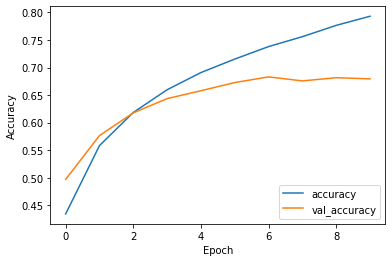

In [ ]:
opt_adam = cnn_basic_model('adam',cifar_train_x,cifar_train_y,10,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 2 : SGD, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1803 - accuracy: 0.1885 - val_loss: 2.0095 - val_accuracy: 0.2686
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8294 - accuracy: 0.3414 - val_loss: 1.6782 - val_accuracy: 0.3971
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6156 - accuracy: 0.4178 - val_loss: 1.6304 - val_accuracy: 0.4106
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4984 - accuracy: 0.4641 - val_loss: 1.4544 - val_accuracy: 0.4744
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4169 - accuracy: 0.4931 - val_loss: 1.3884 - val_accuracy: 0.5067
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3475 - accuracy: 0.5212 - val_loss: 1.3079 - val_accuracy: 0.5396
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2842 - accuracy: 0.5433 - val_loss: 1.3155 - val_accuracy:

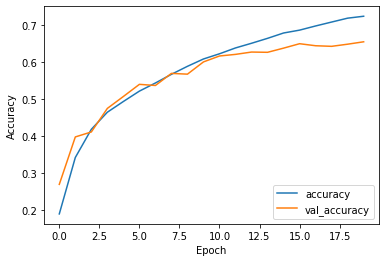

In [ ]:
opt_sgd =cnn_basic_model('sgd',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

#####  Optimizer 3 : Adadelta, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 6s 4ms/step - loss: 2.3040 - accuracy: 0.1026 - val_loss: 2.2998 - val_accuracy: 0.1046
Epoch 2/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2982 - accuracy: 0.1339 - val_loss: 2.2951 - val_accuracy: 0.1426
Epoch 3/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2937 - accuracy: 0.1462 - val_loss: 2.2910 - val_accuracy: 0.1412
Epoch 4/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2896 - accuracy: 0.1507 - val_loss: 2.2870 - val_accuracy: 0.1455
Epoch 5/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2854 - accuracy: 0.1530 - val_loss: 2.2828 - val_accuracy: 0.1516
Epoch 6/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2810 - accuracy: 0.1543 - val_loss: 2.2784 - val_accuracy: 0.1617
Epoch 7/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2764 - accuracy: 0.1655 - val_loss: 2.2736 - val_ac

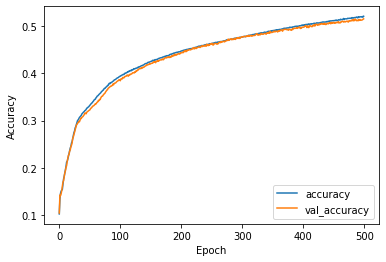

In [ ]:
opt_adadelta= cnn_basic_model('adadelta',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 4 : Adagrad, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2937 - accuracy: 0.1448 - val_loss: 2.2781 - val_accuracy: 0.1769
Epoch 2/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2016 - accuracy: 0.2136 - val_loss: 2.0867 - val_accuracy: 0.2407
Epoch 3/500
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0414 - accuracy: 0.2656 - val_loss: 2.0079 - val_accuracy: 0.2732
Epoch 4/500
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9968 - accuracy: 0.2849 - val_loss: 1.9792 - val_accuracy: 0.2852
Epoch 5/500
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9720 - accuracy: 0.2947 - val_loss: 1.9582 - val_accuracy: 0.2993
Epoch 6/500
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9519 - accuracy: 0.3042 - val_loss: 1.9406 - val_accuracy: 0.3072
Epoch 7/500
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9339 - accuracy: 0.3138 - val_loss: 1.9238 - val_ac

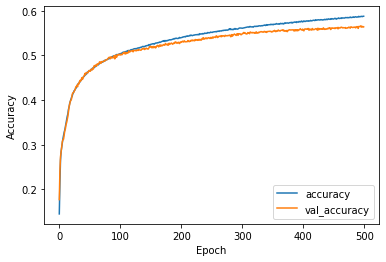

In [ ]:
opt_adagrad = cnn_basic_model('Adagrad',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 5 : Adamax, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7499 - accuracy: 0.3688 - val_loss: 1.5883 - val_accuracy: 0.4297
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5001 - accuracy: 0.4660 - val_loss: 1.4338 - val_accuracy: 0.4919
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3943 - accuracy: 0.5041 - val_loss: 1.3419 - val_accuracy: 0.5264
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3105 - accuracy: 0.5369 - val_loss: 1.3041 - val_accuracy: 0.5474
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2419 - accuracy: 0.5651 - val_loss: 1.2330 - val_accuracy: 0.5640
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1786 - accuracy: 0.5866 - val_loss: 1.1799 - val_accuracy: 0.5872
Epoch 7/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1.1241 - accuracy: 0.6051 - val_loss: 1.1881 - val_accuracy:

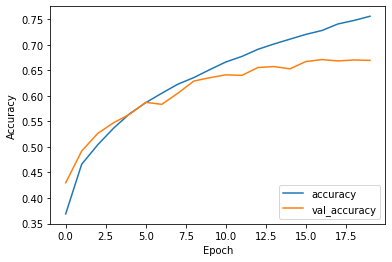

In [ ]:
opt_adamax = cnn_basic_model('adamax',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 6 : FTRL, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.0956 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy:

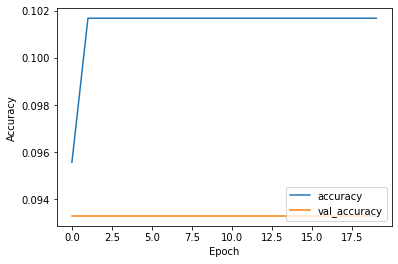

In [ ]:
opt_ftrl = cnn_basic_model('ftrl',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 7 : Nadam, Data : Cifar 10, Epochs : 10

Epoch 1/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5560 - accuracy: 0.4347 - val_loss: 1.3003 - val_accuracy: 0.5380
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2216 - accuracy: 0.5675 - val_loss: 1.1499 - val_accuracy: 0.5953
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0679 - accuracy: 0.6216 - val_loss: 1.0536 - val_accuracy: 0.6383
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9616 - accuracy: 0.6613 - val_loss: 1.0065 - val_accuracy: 0.6506
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8768 - accuracy: 0.6914 - val_loss: 0.9847 - val_accuracy: 0.6563
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8037 - accuracy: 0.7175 - val_loss: 0.9333 - val_accuracy: 0.6763
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7398 - accuracy: 0.7406 - val_loss: 0.9406 - val_accuracy:

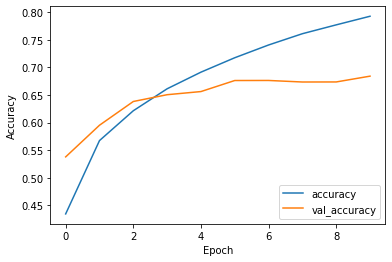

In [ ]:
opt_nadam = cnn_basic_model('Nadam',cifar_train_x,cifar_train_y,10,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### TASK 1.2  Residual Neural Netowrk

##### Resnet Model

In [ ]:
def resnet(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  # Input image shape = 32 x 32 x 3
  # Initial Block
  conv1 = tf.keras.layers.Conv2D(32,1,padding = 'SAME',activation='relu')(inputs) # shape = 32 x 32 x 16 
  conv1_pool = tf.keras.layers.MaxPool2D(2)(conv1) #shape = 32 x 32 x 16
  
  #Block 1
  conv2 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv1_pool) # shape = 16 x 16 x 16
  conv2 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv2) # shape = 16 x 16 x 16
  add1 = tf.keras.layers.Add()([conv1_pool,conv2,]) # shape = 16 x 16 x 16
  add1_relu = tf.keras.layers.Activation('relu')(add1) # shape = 16 x 16 x 16

  conv3 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(add1_relu) # shape = 16 x 16 x 16
  conv3 = tf.keras.layers.Conv2D(32,3,padding = 'SAME',activation='relu')(conv3) # shape = 16 x 16 x 16
  add2 = tf.keras.layers.Add()([add1_relu,conv3]) # shape = 16 x 16 x 16
  add2_relu = tf.keras.layers.Activation('relu')(add2) # shape = 16 x 16 x 16
  
  #Transition 1
  transition_conv1 = tf.keras.layers.Conv2D(64,1,activation = 'relu')(add2_relu) # shape = 16 x 16 x 32
  transition_conv_pool = tf.keras.layers.MaxPool2D(2)(transition_conv1) # shape = 8 x 8 x 32
  
  #Block 2
  conv4 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(transition_conv_pool)  # shape = 8 x 8 x 32
  conv4 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(conv4) # shape = 8 x 8 x 32
  add3 = tf.keras.layers.Add()([transition_conv_pool,conv4]) # shape = 8 x 8 x 32
  add3_relu = tf.keras.layers.Activation('relu')(add3) # shape = 8 x 8 x 32

  conv5 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(add3_relu) # shape = 8 x 8 x 32 
  conv5 = tf.keras.layers.Conv2D(64,3,padding = 'SAME',activation='relu')(conv5)# shape = 8 x 8 x 32
  add4 = tf.keras.layers.Add()([add3_relu,conv5])# shape = 8 x 8 x 32
  add4_relu = tf.keras.layers.Activation('relu')(add4)# shape = 8 x 8 x 32

  #Transition 2
  transition_conv2 = tf.keras.layers.Conv2D(128,1,activation = 'relu')(add4_relu) # shape = 8 x 8 x 64
  transition_conv2_pool = tf.keras.layers.MaxPool2D(2)(transition_conv2) # shape = 4 x 4 x 64
  #print(transition_conv2_pool)

  #Block 3
  conv6 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(transition_conv2_pool) # shape = 4 x 4 x 64 
  conv6 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(conv6)# shape = 4 x 4 x 64
  add5 = tf.keras.layers.Add()([transition_conv2_pool,conv6])# shape = 4 x 4 x 64
  add5_relu = tf.keras.layers.Activation('relu')(add5)# shape = 4 x 4 x 64
  #print(add5_relu)

  conv7 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(add5_relu) # shape = 4 x 4 x 64 
  conv7 = tf.keras.layers.Conv2D(128,3,padding = 'SAME',activation='relu')(conv7)# shape = 4 x 4 x 64
  add6 = tf.keras.layers.Add()([add5_relu,conv7])# shape = 4 x 4 x 64
  add6_relu = tf.keras.layers.Activation('relu')(add6)# shape = 4 x 4 x 64
  #print(add6_relu)

  #Average pool
  avg_pool = tf.keras.layers.MaxPool2D(2)(add6_relu)# shape = 4 x 4 x 64

  #MLP
  mlp = tf.keras.layers.Flatten()(avg_pool)
  mlp = tf.keras.layers.Dense(128,activation='relu')(mlp)
  output = tf.keras.layers.Dense(10,activation='softmax')(mlp)

  model = tf.keras.Model(inputs,output)
  #model.summary()

  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))


#### Training

##### Optimizer 1 : Adam, Data : Cifar 10, Epochs : 10

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1950 - accuracy: 0.2516 - val_loss: 2.1249 - val_accuracy: 0.3263
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1082 - accuracy: 0.3456 - val_loss: 2.0803 - val_accuracy: 0.3755
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.0678 - accuracy: 0.3859 - val_loss: 2.0736 - val_accuracy: 0.3816
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0345 - accuracy: 0.4213 - val_loss: 2.0227 - val_accuracy: 0.4310
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0112 - accuracy: 0.4438 - val_loss: 1.9888 - val_accuracy: 0.4659
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9891 - accuracy: 0.4660 - val_loss: 1.9908 - val_accuracy: 0.4646
Epoch 7/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9735 - accuracy: 0.4825 - val_loss: 1.9709 - val_accuracy:

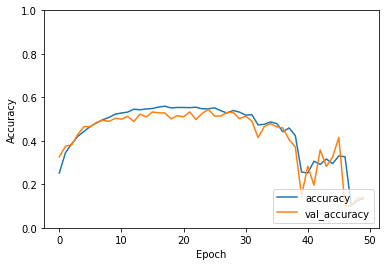

In [ ]:
opt_adam_resnet= resnet('adam',cifar_train_x,cifar_train_y,50,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 2 : SGD, Data : Cifar 10, Epochs : 10

Epoch 1/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2979 - accuracy: 0.1153 - val_loss: 2.2887 - val_accuracy: 0.1163
Epoch 2/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2345 - accuracy: 0.2123 - val_loss: 2.1792 - val_accuracy: 0.2739
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1693 - accuracy: 0.2788 - val_loss: 2.1550 - val_accuracy: 0.2981
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1420 - accuracy: 0.3099 - val_loss: 2.1749 - val_accuracy: 0.2713
Epoch 5/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1185 - accuracy: 0.3363 - val_loss: 2.1017 - val_accuracy: 0.3552
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0969 - accuracy: 0.3583 - val_loss: 2.0864 - val_accuracy: 0.3659
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0794 - accuracy: 0.3763 - val_loss: 2.0752 - val_ac

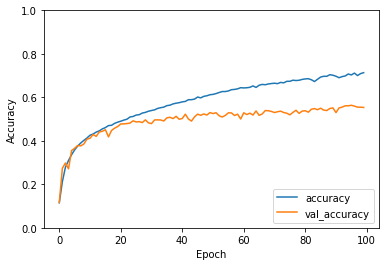

In [ ]:
opt_sgd_resnet =resnet('sgd',cifar_train_x,cifar_train_y,100,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

#####  Optimizer 3 : Adadelta, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3029 - accuracy: 0.1035 - val_loss: 2.3016 - val_accuracy: 0.1311
Epoch 2/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3012 - accuracy: 0.1318 - val_loss: 2.3003 - val_accuracy: 0.1282
Epoch 3/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3000 - accuracy: 0.1156 - val_loss: 2.2991 - val_accuracy: 0.1233
Epoch 4/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2990 - accuracy: 0.1134 - val_loss: 2.2980 - val_accuracy: 0.1212
Epoch 5/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2979 - accuracy: 0.1148 - val_loss: 2.2969 - val_accuracy: 0.1325
Epoch 6/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2967 - accuracy: 0.1406 - val_loss: 2.2956 - val_accuracy: 0.1431
Epoch 7/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2953 - accuracy: 0.1417 - val_loss: 2.2940 - val_ac

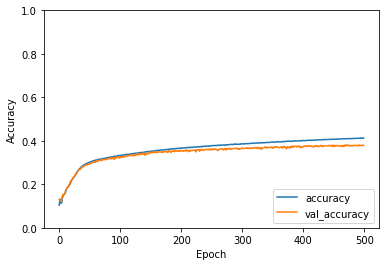

In [ ]:
opt_adadelta_resnet= resnet('adadelta',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 4 : Adagrad, Data : Cifar 10, Epochs : 500

Epoch 1/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3014 - accuracy: 0.1042 - val_loss: 2.2988 - val_accuracy: 0.1034
Epoch 2/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2961 - accuracy: 0.1178 - val_loss: 2.2910 - val_accuracy: 0.1193
Epoch 3/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2805 - accuracy: 0.1560 - val_loss: 2.2657 - val_accuracy: 0.1818
Epoch 4/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2456 - accuracy: 0.2022 - val_loss: 2.2198 - val_accuracy: 0.2405
Epoch 5/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2037 - accuracy: 0.2516 - val_loss: 2.1885 - val_accuracy: 0.2635
Epoch 6/500
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1825 - accuracy: 0.2681 - val_loss: 2.1783 - val_accuracy: 0.2750
Epoch 7/500
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1702 - accuracy: 0.2828 - val_loss: 2.1671 - val_ac

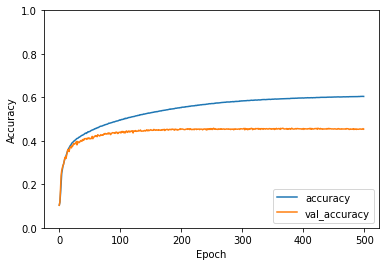

In [ ]:
opt_adagrad_resnet = resnet('Adagrad',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 5 : Adamax, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 2.1569 - accuracy: 0.2918 - val_loss: 2.1172 - val_accuracy: 0.3324
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0916 - accuracy: 0.3619 - val_loss: 2.1138 - val_accuracy: 0.3384
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0502 - accuracy: 0.4051 - val_loss: 2.0365 - val_accuracy: 0.4206
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0126 - accuracy: 0.4432 - val_loss: 2.0083 - val_accuracy: 0.4464
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9855 - accuracy: 0.4710 - val_loss: 1.9669 - val_accuracy: 0.4894
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9601 - accuracy: 0.4967 - val_loss: 1.9676 - val_accuracy: 0.4887
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9406 - accuracy: 0.5175 - val_loss: 1.9366 - val_accuracy:

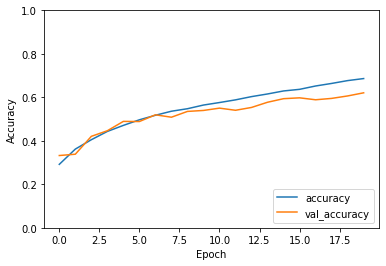

In [ ]:
opt_adamax_resnet = resnet('adamax',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 6 : FTRL, Data : Cifar 10, Epochs : 20

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy:

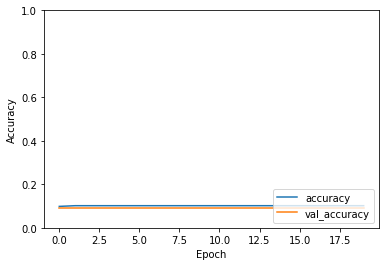

In [ ]:
opt_ftrl_resnet = resnet('ftrl',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 7 : Nadam, Data : Cifar 10, Epochs : 10

Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 2.1651 - accuracy: 0.2841 - val_loss: 2.1246 - val_accuracy: 0.3304
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1011 - accuracy: 0.3512 - val_loss: 2.0797 - val_accuracy: 0.3753
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0646 - accuracy: 0.3898 - val_loss: 2.0533 - val_accuracy: 0.4028
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0429 - accuracy: 0.4125 - val_loss: 2.0230 - val_accuracy: 0.4309
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0154 - accuracy: 0.4405 - val_loss: 1.9848 - val_accuracy: 0.4711
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9933 - accuracy: 0.4628 - val_loss: 1.9921 - val_accuracy: 0.4644
Epoch 7/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9765 - accuracy: 0.4799 - val_loss: 1.9669 - val_ac

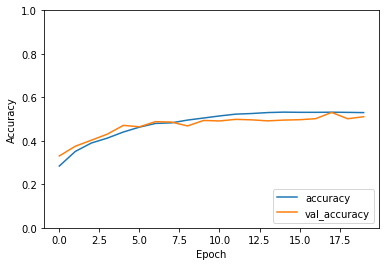

In [ ]:
opt_nadam_resnet = resnet('Nadam',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

### TASK 1.3 Inception Neural Network

#### Model

In [ ]:
def inception_net(opt,train_x,train_y,epo,val_x,val_y,test_x,test_y):
  inputs = tf.keras.layers.Input((32,32,3))
  
  incnet0 = tf.keras.layers.Conv2D(2,3,padding='SAME',activation='relu')(inputs)
  incnet0 = tf.keras.layers.MaxPool2D(2,strides=2)(incnet0)
  print(incnet0)

  # Block 1 :
  # Part 1: incnet0 -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(2,1,padding='SAME',activation='relu')(incnet0)
  #print(incnet_p1)
  # Part 2: incnet0 -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(2,1,padding='SAME',activation='relu')(incnet0)
  incnet_p2 = tf.keras.layers.Conv2D(2,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: incnet0 -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(2,1,padding='SAME',activation='relu')(incnet0)
  incnet_p3 = tf.keras.layers.Conv2D(2,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: incnet0 -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(incnet0)
  incnet_p4 = tf.keras.layers.Conv2D(2,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 1
  block1 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  # Block 2 :
  # Part 1: block1 -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(4,1,padding='SAME',activation='relu')(block1)
  #print(incnet_p1)
  # Part 2: block1 -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(4,1,padding='SAME',activation='relu')(block1)
  incnet_p2 = tf.keras.layers.Conv2D(4,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block1 -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(4,1,padding='SAME',activation='relu')(block1)
  incnet_p3 = tf.keras.layers.Conv2D(4,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block1 -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block1)
  incnet_p4 = tf.keras.layers.Conv2D(4,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block2 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  #Block2 Maxpool 2x2,stride = 2
  block2_maxpool = tf.keras.layers.MaxPool2D(2,strides=2)(block2)

  # Block 3 :
  # Part 1: block2maxpool -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(8,1,padding='SAME',activation='relu')(block2_maxpool)
  #print(incnet_p1)
  # Part 2: block2maxpool -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(8,1,padding='SAME',activation='relu')(block2_maxpool)
  incnet_p2 = tf.keras.layers.Conv2D(8,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block2maxpool -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(8,1,padding='SAME',activation='relu')(block2_maxpool)
  incnet_p3 = tf.keras.layers.Conv2D(8,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block2maxpool -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block2_maxpool)
  incnet_p4 = tf.keras.layers.Conv2D(8,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block3 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  # Block 4 :
  # Part 1: block3 -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(16,1,padding='SAME',activation='relu')(block3)
  #print(incnet_p1)
  # Part 2: block3 -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(16,1,padding='SAME',activation='relu')(block3)
  incnet_p2 = tf.keras.layers.Conv2D(16,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block3 -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(16,1,padding='SAME',activation='relu')(block3)
  incnet_p3 = tf.keras.layers.Conv2D(16,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block3 -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block3)
  incnet_p4 = tf.keras.layers.Conv2D(16,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block4 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  #Block2 Maxpool 2x2,stride = 2
  block4_maxpool = tf.keras.layers.MaxPool2D(2,strides=2)(block4) 

  # Block 5 :
  # Part 1: block4_maxpool -> 1x1x32 convo
  incnet_p1 = tf.keras.layers.Conv2D(32,1,padding='SAME',activation='relu')(block4_maxpool)
  #print(incnet_p1)
  # Part 2: block4_maxpool -> 1x1x32 -> 3x3x32 
  incnet_p2 = tf.keras.layers.Conv2D(32,1,padding='SAME',activation='relu')(block4_maxpool)
  incnet_p2 = tf.keras.layers.Conv2D(32,3,padding='SAME',activation='relu')(incnet_p2)
  #print(incnet_p2)
  # Part 3: block4_maxpool -> 1x1x32 -> 5x5x32
  incnet_p3 = tf.keras.layers.Conv2D(32,1,padding='SAME',activation='relu')(block4_maxpool)
  incnet_p3 = tf.keras.layers.Conv2D(32,5,padding='SAME',activation='relu')(incnet_p3)
  #print(incnet_p3)
  # Part 4: block4_maxpool -> maxpool 3x3,stride= 1 -> 1x1x32
  incnet_p4 = tf.keras.layers.MaxPool2D(2,strides=1,padding='SAME')(block4_maxpool)
  incnet_p4 = tf.keras.layers.Conv2D(32,1,padding='SAME', activation='relu')(incnet_p4)
  #print(incnet_p4)
  # Concate all parts of block 2
  block5 = tf.keras.layers.concatenate([incnet_p1,incnet_p2,incnet_p3,incnet_p4])

  #avgpool
  avg_pool = tf.keras.layers.MaxPool2D(2)(block5)

  mlp = tf.keras.layers.Flatten()(avg_pool)
  mlp = tf.keras.layers.Dense(128,activation='relu')(mlp)
  output = tf.keras.layers.Dense(10,activation='softmax')(mlp)

  model = tf.keras.Model(inputs,output)
  #model.summary()
  model.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
  history = model.fit(train_x, train_y, epochs=epo, validation_data=(val_x, val_y))
  
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='lower right')

  test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
  print('Test Data Loss : {}, Test Data Accuracy : {}'.format(test_loss,test_acc))

#### Training

##### Optimizer 1 : Adam, Data : Cifar 10, Epochs : 10

Tensor("max_pooling2d_144/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Model: "functional_38"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_513 (Conv2D)             (None, 32, 32, 2)    56          input_37[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_144 (MaxPooling2D (None, 16, 16, 2)    0           conv2d_513[0][0]                 
__________________________________________________________________________________________________
conv2d_515 (Conv2D)             (None, 16, 16, 2)    6           max_pooling2d_144[0][0]          
________

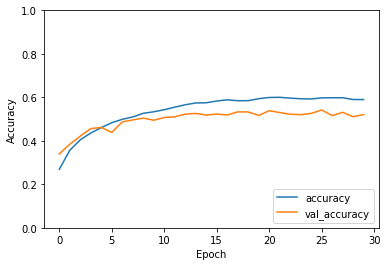

In [ ]:
opt_adam_inception_net= inception_net('adam',cifar_train_x,cifar_train_y,30,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 2 : SGD, Data : Cifar 10, Epochs : 20

Tensor("max_pooling2d_45/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3005 - accuracy: 0.1005 - val_loss: 2.2992 - val_accuracy: 0.0980
Epoch 2/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.2959 - accuracy: 0.1190 - val_loss: 2.2905 - val_accuracy: 0.1312
Epoch 3/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.2734 - accuracy: 0.1640 - val_loss: 2.2452 - val_accuracy: 0.2079
Epoch 4/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.2093 - accuracy: 0.2468 - val_loss: 2.2047 - val_accuracy: 0.2450
Epoch 5/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1799 - accuracy: 0.2703 - val_loss: 2.1590 - val_accuracy: 0.2953
Epoch 6/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1503 - accuracy: 0.3025 - val_loss: 2.1311 - val_accuracy: 0.3260
Epoch 7/70
1250/1250 [==============================]

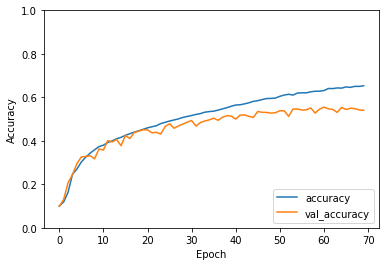

In [ ]:
opt_sgd_inception_net =inception_net('sgd',cifar_train_x,cifar_train_y,70,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

#####  Optimizer 3 : Adadelta, Data : Cifar 10, Epochs : 500

Tensor("max_pooling2d_54/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/500
1250/1250 [==============================] - 13s 10ms/step - loss: 2.3025 - accuracy: 0.0862 - val_loss: 2.3025 - val_accuracy: 0.0870
Epoch 2/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0877 - val_loss: 2.3025 - val_accuracy: 0.0870
Epoch 3/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0891 - val_loss: 2.3025 - val_accuracy: 0.0875
Epoch 4/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0905 - val_loss: 2.3025 - val_accuracy: 0.0889
Epoch 5/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0918 - val_loss: 2.3025 - val_accuracy: 0.0907
Epoch 6/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.0931 - val_loss: 2.3025 - val_accuracy: 0.0933
Epoch 7/500
1250/1250 [==================

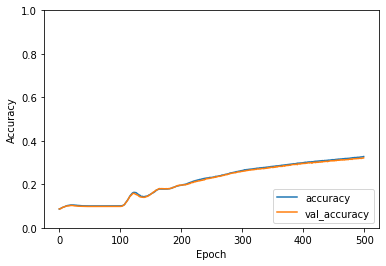

In [ ]:
opt_adadelta_inception_net= inception_net('adadelta',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 4 : Adagrad, Data : Cifar 10, Epochs : 500

Tensor("max_pooling2d_63/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1070
Epoch 2/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.1114 - val_loss: 2.3025 - val_accuracy: 0.1325
Epoch 3/500
1250/1250 [==============================] - 12s 9ms/step - loss: 2.3025 - accuracy: 0.1359 - val_loss: 2.3025 - val_accuracy: 0.1424
Epoch 4/500
1250/1250 [==============================] - 12s 9ms/step - loss: 2.3025 - accuracy: 0.1387 - val_loss: 2.3025 - val_accuracy: 0.1456
Epoch 5/500
1250/1250 [==============================] - 12s 10ms/step - loss: 2.3025 - accuracy: 0.1486 - val_loss: 2.3025 - val_accuracy: 0.1489
Epoch 6/500
1250/1250 [==============================] - 12s 9ms/step - loss: 2.3025 - accuracy: 0.1487 - val_loss: 2.3025 - val_accuracy: 0.1459
Epoch 7/500
1250/1250 [=====================

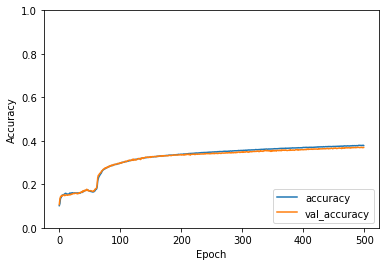

In [ ]:
opt_adagrad_inception_net = inception_net('Adagrad',cifar_train_x,cifar_train_y,500,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 5 : Adamax, Data : Cifar 10, Epochs : 20

Tensor("max_pooling2d_72/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 2.1842 - accuracy: 0.2631 - val_loss: 2.1522 - val_accuracy: 0.2951
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1156 - accuracy: 0.3369 - val_loss: 2.0949 - val_accuracy: 0.3592
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0827 - accuracy: 0.3715 - val_loss: 2.0893 - val_accuracy: 0.3645
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0610 - accuracy: 0.3938 - val_loss: 2.0537 - val_accuracy: 0.3996
Epoch 5/20
1250/1250 [==============================] - 12s 9ms/step - loss: 2.0417 - accuracy: 0.4146 - val_loss: 2.0442 - val_accuracy: 0.4081
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0257 - accuracy: 0.4307 - val_loss: 2.0316 - val_accuracy: 0.4229
Epoch 7/20
1250/1250 [==============================]

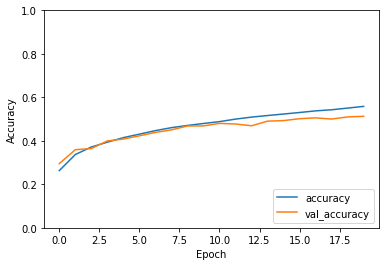

In [ ]:
opt_adamax_inception_net = inception_net('adamax',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 6 : FTRL, Data : Cifar 10, Epochs : 20

Tensor("max_pooling2d_81/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0933
Epoch 7/20
1250/1250 [==============================]

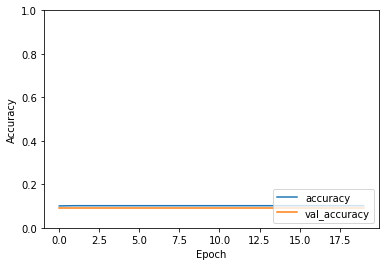

In [ ]:
opt_ftrl_inception_net = inception_net('ftrl',cifar_train_x,cifar_train_y,20,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

##### Optimizer 7 : Nadam, Data : Cifar 10, Epochs : 10

Tensor("max_pooling2d_90/MaxPool:0", shape=(None, 16, 16, 2), dtype=float32)
Epoch 1/10
1250/1250 [==============================] - 20s 16ms/step - loss: 2.1377 - accuracy: 0.3107 - val_loss: 2.0742 - val_accuracy: 0.3814
Epoch 2/10
1250/1250 [==============================] - 20s 16ms/step - loss: 2.0359 - accuracy: 0.4201 - val_loss: 2.0108 - val_accuracy: 0.4429
Epoch 3/10
1250/1250 [==============================] - 20s 16ms/step - loss: 2.0004 - accuracy: 0.4565 - val_loss: 2.0001 - val_accuracy: 0.4573
Epoch 4/10
1250/1250 [==============================] - 19s 16ms/step - loss: 1.9754 - accuracy: 0.4826 - val_loss: 1.9763 - val_accuracy: 0.4795
Epoch 5/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.9576 - accuracy: 0.5004 - val_loss: 1.9687 - val_accuracy: 0.4898
Epoch 6/10
1250/1250 [==============================] - 20s 16ms/step - loss: 1.9412 - accuracy: 0.5162 - val_loss: 1.9571 - val_accuracy: 0.5006
Epoch 7/10
1250/1250 [=========================

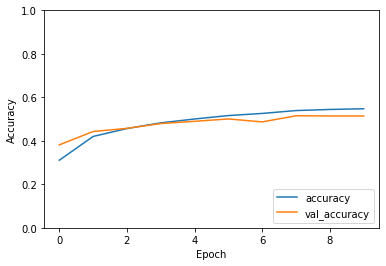

In [ ]:
opt_nadam_inception_net = inception_net('Nadam',cifar_train_x,cifar_train_y,10,cifar_val_x,cifar_val_y,cifar_test_x,cifar_test_y)

## Task Summary

| S.no | Model        | Optimizer | Training Accuracy | Validation Accuracy | Testing Accuracy | Total Epochs | Epochs untill Convergence | Observation                                                                                               |
|------|--------------|-----------|-------------------|---------------------|------------------|--------------|---------------------------|-----------------------------------------------------------------------------------------------------------|
| 1.a  | Basic CNN    | Adam      | 79.29             | 67.94               | 67.57            | 10           | More than 10              | Overfitting observed after 2 epochs                                                                       |
| 1.b  | Basic CNN    | SGD       | 78.71             | 65.49               | 65.70            | 20           | More than 10              | Overfitting observed after 10 epochs                                                                      |
| 1.c  | Basic CNN    | Adadelta  | 52.08             | 51.53               | 51.33            | 500          | More than 500             | Very slow learning. Thus more epochs needed.No overfitting                                                |
| 1.d  | Basic CNN    | Adagrad   | 58.80             | 56.41               | 57.17            | 500          | More than 500             | Very slow learning. Thus more epochs needed. No overfitting                                               |
| 1.e  | Basic CNN    | Adamax    | 75.58             | 66.94               | 67.36            | 20           | More than 20              | Overfitting observed after 8 epochs                                                                       |
| 1.f  | Basic CNN    | FTRL      | 1.017             | 0.933               | 0.1              | 20           | More than 20              | No learninig                                                                                              |
| 1.g  | Basic CNN    | Nadam     | 79.27             | 68.42               | 68.43            | 10           | More than 10              | Overfitting observed after 2 epochs                                                                       |
| 2.a  | Resnet       | Adam      | 54.73             | 52.62               | 50.51            | 50           | 10 epochs                 | After 20 epochs, the accuracy starts decreasing.This might be indication of getting stuck in local minima |
| 2.b  | Resnet       | SGD       | 71.43             | 55.35               | 54.75            | 100          | More than 100 epochs      | Overfitting observed after 20 epochs                                                                      |
| 2.c  | Resnet       | Adadelta  | 41.24             | 38.0                | 38.36            | 500          | 500 epochs                | Very slow learning. No overfitting                                                                        |
| 2.d  | Resnet       | Adagrad   | 60.41             | 45.39               | 45.85            | 500          | 300 epochs                | very slow learning, Overfitting observed at initial epochs                                                |
| 2.e  | Resnet       | Adamax    | 68.63             | 62.08               | 61.82            | 20           | More than 20 epochs       | Slight overfitting observed but may be trained for more epochs                                            |
| 2.f  | Resnet       | FTRL      | 1.01              | 0.9                 | 1                | 20           | No learning               | No learning                                                                                               |
| 2.g  | Resnet       | Nadam     | 52.98             | 51.09               | 50.59            | 20           | 10 epochs                 | Training not efficient but no overfitting. May be stuck in local minima                                   |
| 3.a  | InceptionNet | Adam      | 58.97             | 52.06               | 51.91            | 20           | 15 epochs                 | Training not efficient. No overfitting                                                                    |
| 3.b  | InceptionNet | SGD       | 65.32             | 54.06               | 54.54            | 70           | More than 70 epochs       | Overfitting observed after 40 epochs. The accuracy line of valiation is wavy                              |
| 3.c  | InceptionNet | Adadelta  | 32.77             | 32.18               | 32.97            | 500          | More than 500 epochs      | Very slow learning, No overfitting                                                                        |
| 3.d  | InceptionNet | Adagrad   | 37.85             | 36.95               | 37.94            | 500          | 400 epochs                | Very slow learning, Inefficient learning, No overfitting                                                  |
| 3.e  | InceptionNet | Adamax    | 55.84             | 51.28               | 50.89            | 20           | More than 20              | Learning is still possible without overfitting                                                            |
| 3.f  | InceptionNet | FTRL      | 1.017             | 0.9                 | 1.0              | 20           | No learning               | No learning                                                                                               |
| 3.g  | InceptionNet | Nadam     | 54.76             | 51.43               | 50.94            | 10           | 8 epochs                  | Inefficient learning                                                                                      |

* Adam : Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

* SGD : Stochastic Gradient Descent

* Adadelta : Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:

  *  The continual decay of learning rates throughout training
  *  The need for a manually selected global learning rate

* Adagrad : Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.

* Adamax : It is a variant of Adam based on the infinity norm. Default parameters follow those provided in the paper. Adamax is sometimes superior to adam, specially in models with embeddings.

* FTRL : Integrated L2 and L1 penalty

* Nadam : like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.


It was observed that Adadelta and Adagrad performed similar for all the models as it was seen that they are very slow in learning. The possible reason for this could be adaptive learning rate.

FTRL optimizer had the same effect in every model and resulted in no learning.

The other optimizers were affected by the model complexity and number of parameters.